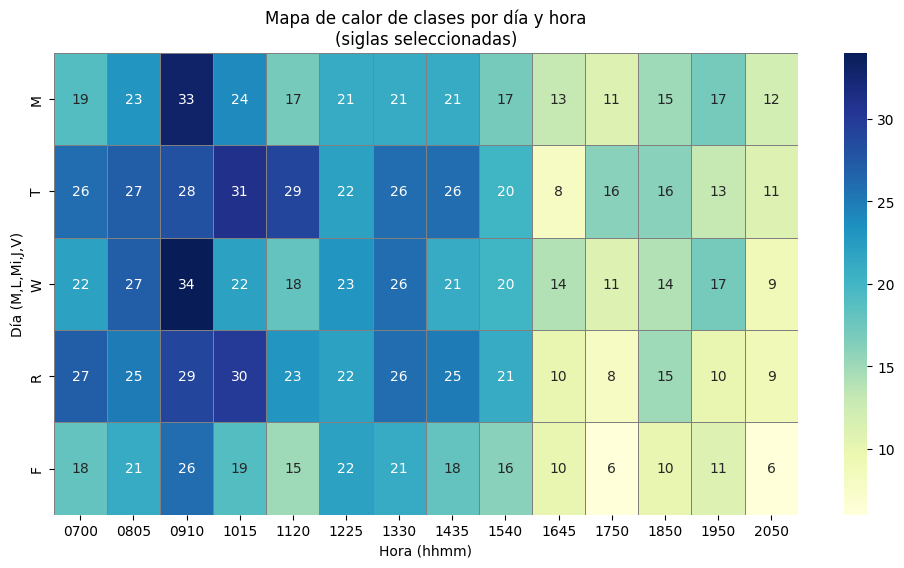

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el archivo Excel (ajusta la ruta y el nombre de la hoja según tu archivo)
df = pd.read_excel(
    "files/horarios.xlsx", sheet_name="data", header=0
)

# 2. Definir la lista de SIGLA a filtrar
siglas = [
    "GSTR4489",
    "GSTR4490",
    "VIDA0001",
    "VIDA0002",
    "MATZ0014",
    "INGZ0111",
    "GSTR4522",
    "GSTR4523",
    "GSTR4494",
    "VIDA0003",
    "VIDA0004",
    "GSTR4491",
    "GSTR4496",
    "GSTR4525",
    "GSTR4511",
    "GSTR4526",
    "GSTR4514",
    "GSTR2148",
    "GSTR4524",
    "GSTR4527",
    "GSTR4528",
    "GSTR4502",
    "GSTR4529",
    "GSTR4517",
    "FINZ1248",
    "GSTR4503",
    "GSTR4504",
    "GSTR4519",
    "GSTR4505",
    "GSTR4531",
    "GSTR4508",
    "GSTR4507",
    "GSTR3278",
    "GSTR4532",
    "GSTR4533",
    "TITA0611",
]

# 3. Filtrar el DataFrame por esas SIGLA
df_filtrado = df[df["SIGLA"].isin(siglas)].copy()


# 4. Extraer día y hora del campo MEET_ID
def parse_meet_id(meet_id):
    """
    Espera un string tipo 'M1015', 'T1115', etc.
    Donde la primera letra es el día (M, T, W, R, F)
    y los siguientes 4 dígitos la hora (hhmm).
    """
    match = re.match(r"([MTWRF])(\d{4})", str(meet_id))
    if match:
        return match.group(1), match.group(2)
    return None, None


# Aplicar la función y crear dos columnas nuevas
df_filtrado["DIA"], df_filtrado["HORA"] = zip(
    *df_filtrado["MEET_ID"].apply(parse_meet_id)
)

# 5. Construir la tabla de conteos por día y hora
heatmap_data = df_filtrado.pivot_table(
    index="DIA",
    columns="HORA",
    values="SIGLA",  # puede ser cualquier columna, usamos SIGLA para contar
    aggfunc="count",
    fill_value=0,
)

# 6. Asegurar el orden de los días y de las horas
dias_orden = ["M", "T", "W", "R", "F"]
heatmap_data = heatmap_data.reindex(dias_orden)
heatmap_data = heatmap_data.sort_index(axis=1)

# 7. Graficar el mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, linecolor="gray"
)
plt.title("Mapa de calor de clases por día y hora\n(siglas seleccionadas)")
plt.xlabel("Hora (hhmm)")
plt.ylabel("Día (M,L,Mi,J,V)")
plt.show()